In [1]:
import numpy as np
from random import randint, random

import matplotlib.pyplot as plt

from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors

from sklearn.datasets import load_breast_cancer    # data source

In [2]:
# List comprehension
nested_list = [randint(1,10) for i in range(50)]
matrix1 = np.array([nested_list])
print('matrix1:\n', matrix1)

matrix2 = matrix1.reshape(5,10)
print('matrix2:\n', matrix2, '\n')

print('1: ', matrix2[:,[0]])    # first column
print('2: ', matrix2[:,0])    # first row
print('3:\n', matrix2[0:3,0:3])    # gives 3x3 matrix
print('4:', matrix2[3,0:3])
print('4:', type(matrix2[3,0:3]))
print('4:', matrix2[3,0:3].shape)
print('5:', matrix2[3:4,0:3])
print('5:', type(matrix2[3:4,0:3]))
print('5:', matrix2[3:4,0:3].shape)

matrix1:
 [[ 8  1  7  5  9  7  8  2  6  5 10  9  3  9  4  5  2  8  3  9  8  9  6  2
   7  8  3  2  6  3  7  7  4  4  2  8  3  6  3  4 10  2  4  5  2  5  6  1
  10  9]]
matrix2:
 [[ 8  1  7  5  9  7  8  2  6  5]
 [10  9  3  9  4  5  2  8  3  9]
 [ 8  9  6  2  7  8  3  2  6  3]
 [ 7  7  4  4  2  8  3  6  3  4]
 [10  2  4  5  2  5  6  1 10  9]] 

1:  [[ 8]
 [10]
 [ 8]
 [ 7]
 [10]]
2:  [ 8 10  8  7 10]
3:
 [[ 8  1  7]
 [10  9  3]
 [ 8  9  6]]
4: [7 7 4]
4: <class 'numpy.ndarray'>
4: (3,)
5: [[7 7 4]]
5: <class 'numpy.ndarray'>
5: (1, 3)


# Q1 Confusion Matrix
Calculate accuracy, sensitivity and false positive rate.<br>
<br>
Accuracy = total correct predictions / total records <br>
Sensitivity = total correct positive cases / total positive cases (aka recall )<br>
False positive rate = total false positives / total negative cases(the actual negative cases that have been predicted to be positive)

In [3]:
def get_metrics(actual, predicted, labels):
    metrics = {'confusion matrix': '', 'total records':'','accuracy':'','sensitivity':'','false positive rate':''}
    positive = labels[1]
    negative = labels[0]
        
    g1,g2,g3,g4 = (0,0,0,0)
    
    for i,item in enumerate(actual):
        if item == negative:
            if predicted[i] == negative:
                g1 += 1
            elif predicted[i] == positive:
                g2 += 1
            
        elif item == positive:
            # actual positives
            if predicted[i] == negative:
                g3 += 1
            elif predicted[i] == positive:
                g4 += 1     
    correct_pred = g1 + g4
    total_posi = g3 + g4          # actual
    total_nega = g1 + g2          # actual
    
    # print(g1,g2,g3,g4)
    
    conf_matrix = np.array([g1,g2,g3,g4])
    metrics['confusion matrix'] = conf_matrix.reshape(2,2)
    metrics['total records'] = len(actual)
    metrics['accuracy'] = round((correct_pred)/len(actual),3)
    metrics['sensitivity'] = round(g4/total_posi,3)
    metrics['false positive rate'] = round(g2/total_nega,3)
    return metrics

actual = [ 'cat' , 'cat' , 'cat' , 'cat' , 'bird' , 'bird' , 'bird' , 'bird' ]
predicted = [ 'cat' , 'cat' , 'bird' , 'bird' , 'cat' , 'bird' , 'bird' , 'bird']
labels = [ 'bird' , 'cat' ]

print(get_metrics(actual, predicted, labels) )

{'confusion matrix': array([[3, 1],
       [2, 2]]), 'total records': 8, 'accuracy': 0.625, 'sensitivity': 0.5, 'false positive rate': 0.25}


# Q2 Five Number Summary

In [4]:
def five_number_summary(columns):
    # takes in numpy array, returns list of dictionaries
    
    print(columns.shape)
    if len(columns.shape) == 1:
        return None
    
    ans = []
    for i in range(columns.shape[1]):
        col = columns[:,i]
        dct = {'maximum': 0, 'minimum':0, 'median':0, 'first quartile': 0,'third quartile':0}
        dct['maximum'] = np.max(col)
        dct['minimum'] = np.min(col)
        dct['median'] = np.median(col)
        dct['first quartile'] = np.percentile(col,25)
        dct['third quartile'] = np.percentile(col,75)
        ans.append(dct)
    return ans
    
# test case 1
from sklearn.datasets import load_breast_cancer
bunchobject = load_breast_cancer()

col_no1 = [0,1,2]
columns = bunchobject.data[:,col_no1]
print(columns)
print(five_number_summary(columns))    

[[ 17.99  10.38 122.8 ]
 [ 20.57  17.77 132.9 ]
 [ 19.69  21.25 130.  ]
 ...
 [ 16.6   28.08 108.3 ]
 [ 20.6   29.33 140.1 ]
 [  7.76  24.54  47.92]]
(569, 3)
[{'maximum': 28.11, 'minimum': 6.981, 'median': 13.37, 'first quartile': 11.7, 'third quartile': 15.78}, {'maximum': 39.28, 'minimum': 9.71, 'median': 18.84, 'first quartile': 16.17, 'third quartile': 21.8}, {'maximum': 188.5, 'minimum': 43.79, 'median': 86.24, 'first quartile': 75.17, 'third quartile': 104.1}]


# Q3 MinMax Normalisation

In [5]:
def normalize_minmax(data):
    # data should be a 2D-numpy array
    size = data.shape
    if len(size) == 1:
        return None
    total_columns = size[1]
    
    for i in range(total_columns):       # for each column in data
        maximum = np.max( data[:, i])    # maximum of the current column
        minimum = np.min( data[:, i])    # minimuim of the current column
        denom = maximum - minimum
        data[:, i] = (data[:, i] - minimum)/denom
    return data
        
# test case
first_column = bunchobject.data[:,[ 1 ]]
first_column_norm = normalize_minmax(first_column)
print(five_number_summary(first_column_norm))

(569, 1)
[{'maximum': 1.0, 'minimum': 0.0, 'median': 0.30875887724044637, 'first quartile': 0.21846466012850865, 'third quartile': 0.40886033141697664}]


# Q4 k-NN Model

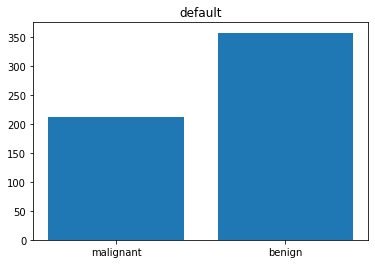

In [6]:
def display_bar_chart (positions, counts, names, title_name= 'default' ):
    
    plt.title(title_name)
    plt.bar(positions, counts, align='center')
    plt.xticks(positions, names)
    plt.show()

from sklearn.datasets import load_breast_cancer
bunchobject = load_breast_cancer()

unique, counts = np.unique(bunchobject.target, return_counts = True )
display_bar_chart(unique, counts, bunchobject.target_names)

In [7]:
def knn_classifier(bunchobject, feature_list, size, seed, k):
    data = bunchobject.data[:, feature_list]
    target = bunchobject.target
    
    # normalize each feature using min/max normalisation
    # custom function
    data = normalize_minmax(data)
    
    # split data set
    # from sklearn.model_selection import train_test_split
    data_train, data_test, target_train, target_test = train_test_split(data,
                                                                        target,
                                                                        test_size = size,
                                                                        random_state = seed)
    
    # create k-NN classifier object
    # from sklearn import  neighbors
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(data_train, target_train)
    target_predicted = clf.predict(data_test)
    
    # for breastcancer data, 0 >> benign, 1 >> malignant
    # custom function
    results = get_metrics(target_test, target_predicted,[1,0])
    
    return results
    
feature_list = range(20) #features from column 0 to 19
results = knn_classifier(bunchobject, feature_list, 0.40 , 2752 , 3 )
print(results)

{'confusion matrix': array([[141,   5],
       [  9,  73]]), 'total records': 228, 'accuracy': 0.939, 'sensitivity': 0.89, 'false positive rate': 0.034}


# Q5 Linear Regression

In [8]:
def display_scatter(x,y,xlabel='x',ylabel='y',tite_name = 'default'):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


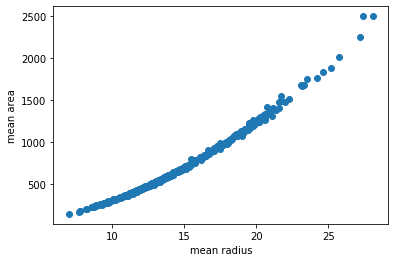

{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]), 'mean squared error': 2631.2988797244757, 'r2 score': 0.9777253933521517}


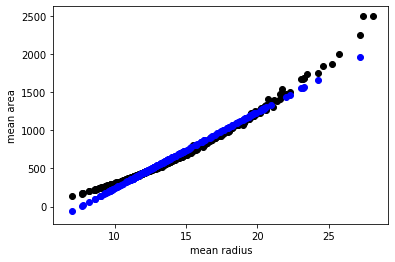

In [9]:
def linear_regression(bunchobject, x_index, y_index, size, seed):
    
    x = bunchobject.data[:,[x_index] ]
    y = bunchobject.data[:,[y_index] ]

    # from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = size,
                                                    random_state = seed)
    
    # from sklearn import linear_model 
    regr = linear_model.LinearRegression()    # create an object
    regr.fit(x_train,y_train)                 # obtain a function for regr object
    y_pred = regr.predict(x_test)
    
    # from sklearn.metrics import mean_squared_error, r2_score
    results = {'coefficients': 0, 'intercept': 0, 'mean squared error': 0, 'r2 score': 0}
    results['coefficients'] = regr.coef_
    results['intercept'] = regr.intercept_
    results['mean squared error'] = mean_squared_error(y_pred, y_test)
    results['r2 score'] = r2_score(y_test, y_pred)
    
    return x_train, y_train, x_test, y_pred, results

def plot_linear_regression(x1,y1,x2,y2,x_label='',y_label=''):
    plt.scatter(x1,y1, color = 'black')
    plt.scatter(x2,y2, color = 'blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# test code
from sklearn.datasets import load_breast_cancer
bunchobject = load_breast_cancer()
    
x_index = 0
y_index = 3

x = bunchobject.data[:,[x_index] ]
y = bunchobject.data[:,[y_index] ]

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

# plot the original dataset
display_scatter(x,y,x_label,y_label)
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject, x_index, y_index, 0.4, 2752)
print(results)
plot_linear_regression(x,y,x_test,y_pred,x_label,y_label)

# Q6 Multiple Linear Regression
Second Order Model, Polynomial Regression <br>
$y$ = $a_{0}$$x^{2}$ + $a_{1}$$x$ + $a_{2}$

{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
         7.97220165e-03]]), 'intercept': array([459.72265999]), 'mean squared error': 145.64415629851655, 'r2 score': 0.9987670855952149}


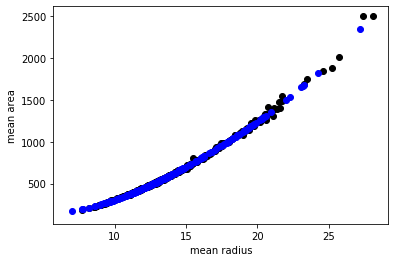

In [10]:
def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
         
    x = bunchobject.data[:,[x_index] ]
    y = bunchobject.data[:,[y_index] ]
    
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(order, include_bias = False)
    x_matrix = poly.fit_transform(x)         # creates a numpy array for the many rows of  1  x  x^2

    # from sklearn.model_selection import train_test_split
    x_matrix_train, x_matrix_test, y_train, y_test = train_test_split(x_matrix, y,
                                                    test_size = size,
                                                    random_state = seed)
    
    # from sklearn import linear_model 
    regr = linear_model.LinearRegression()    # create an object
    regr.fit(x_matrix_train,y_train)                 # obtain a function for regr object
    y_pred = regr.predict(x_matrix_test)
    
    # from sklearn.metrics import mean_squared_error, r2_score
    results = {'coefficients': 0, 'intercept': 0, 'mean squared error': 0, 'r2 score': 0}
    results['coefficients'] = regr.coef_
    results['intercept'] = regr.intercept_
    results['mean squared error'] = mean_squared_error(y_pred, y_test)
    results['r2 score'] = r2_score(y_test, y_pred)
    
    return x_matrix_train[:,[0]], y_train, x_test[:,[0]], y_pred, results

# Test Script
x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject, 0 , 3 , 4 , 0.4 , 2752 )
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred, bunchobject.feature_names[0], bunchobject.feature_names[3])

# Q7 k-Nearest Neighbours (full)
Determine the best k value for highest accuracy <br>
Data: training set, validation set (to choose best k-value), testing set <br>

In [11]:
def knn_classifier_full(bunchobject, feature_list, size, seed):
    data = bunchobject.data[:, feature_list]
    target = bunchobject.target
    
    data = normalize_minmax(data)
    
    # train: 60%, validation: 20%, test: 20%
    data_train, data_part2, target_train, target_part2 = train_test_split(data, 
                                                                          target, 
                                                                          test_size = size, 
                                                                          random_state = seed)
    # split part2 into validation & test
    data_validation, data_test, target_validation, target_test = train_test_split(data_part2, 
                                                                                  target_part2, 
                                                                                  test_size = 0.5, 
                                                                                  random_state = seed)    
    acc = []
    for k in range(1,21):
        clf = neighbors.KNeighborsClassifier(k)
        clf.fit(data_train, target_train)
        target_predicted = clf.predict(data_validation)
        results = get_metrics(target_validation, target_predicted,[1,0])
        acc.append(results['accuracy'])
        
    max_acc = max(acc)
    best_k = acc.index(max_acc) + 1       # get k value with highest accuracy
    
    out_results = {}
    clf = neighbors.KNeighborsClassifier(best_k)
    clf.fit(data_train, target_train)
    target_predicted1 = clf.predict(data_validation)
    validation_metrics = get_metrics(target_validation, target_predicted1,[1,0])
    
    target_predicted2 = clf.predict(data_test)
    test_metrics = get_metrics(target_test, target_predicted2, [1,0])
    
    out_results = {'best k': best_k, 'validation set': validation_metrics, 'test set': test_metrics}
    
    return out_results
    
feature_list = range(20) #features from column 0 to 19
results = knn_classifier_full(bunchobject, feature_list, 0.40 , 2752)
print(results)

{'best k': 4, 'validation set': {'confusion matrix': array([[71,  2],
       [ 2, 39]]), 'total records': 114, 'accuracy': 0.965, 'sensitivity': 0.951, 'false positive rate': 0.027}, 'test set': {'confusion matrix': array([[69,  4],
       [ 1, 40]]), 'total records': 114, 'accuracy': 0.956, 'sensitivity': 0.976, 'false positive rate': 0.055}}
